## Preliminary settings

In order to plot fields, we run the following commands:

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

The modules to import for dealing with grids are:

In [66]:
from pygsf.mathematics.arrays import *
from pygsf.spatial.rasters.geotransform import *
from pygsf.spatial.rasters.fields import *

For calculating pathlines:

In [67]:
from pygsf.space_time.movements import interpolate_rkf

## Velocity field with circular motion

The example circular motion vector field has components:

**v** = y **i** - x **j**

as deriving from the equation:

**v** = - **z** x **r**

where **z** is the vertical vector, **r** the position vector and *x* the vector product.

In [68]:
def z_func_fx(x, y):

    return y

def z_func_fy(x, y):

    return - x

### geotransform and grid definitions

In [69]:
rows=100; cols=100

In [70]:
size_x = 1; size_y = 1

In [71]:
tlx = -50.0; tly = 50.0 

In [72]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

### vector field x-component

In [73]:
fx1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [74]:
print(fx1)

[[ 49.5  49.5  49.5 ...  49.5  49.5  49.5]
 [ 48.5  48.5  48.5 ...  48.5  48.5  48.5]
 [ 47.5  47.5  47.5 ...  47.5  47.5  47.5]
 ...
 [-47.5 -47.5 -47.5 ... -47.5 -47.5 -47.5]
 [-48.5 -48.5 -48.5 ... -48.5 -48.5 -48.5]
 [-49.5 -49.5 -49.5 ... -49.5 -49.5 -49.5]]


### vector field y-component

In [75]:
fy1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [76]:
print(fy1)

[[ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]
 [ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]
 [ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]
 ...
 [ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]
 [ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]
 [ 49.5  48.5  47.5 ... -47.5 -48.5 -49.5]]


### flow characteristics: magnitude and streamlines

To visualize the parameters of the flow, we calculate the geographic coordinates:

In [77]:
X, Y = gtToXY(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

and the vector field magnitude:

In [78]:
magn = magnitude(
    fld_x=fx1, 
    fld_y=fy1)

Text(0,0.5,'y')

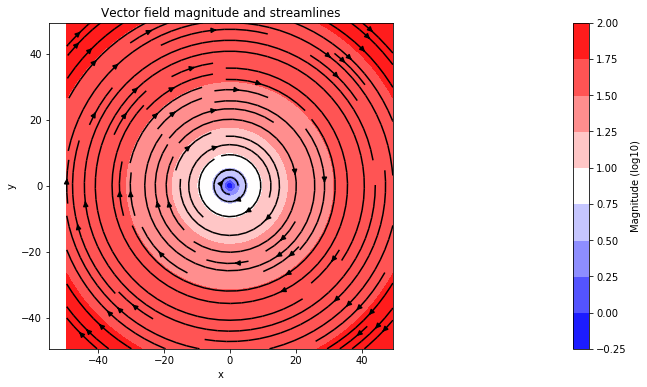

In [79]:
fig = plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')


In [80]:
import math
from pygsf.spatial.vectorial.vectorial import Point
from pygsf.spatial.rasters.geoarray import GeoArray

In [81]:
ga = GeoArray(
    inGeotransform=gt1,
    inProjection="undef",
    inLevels=[fx1, fy1])

In [86]:
increm = 1.0e-4
steps = 20000

In [87]:
first_pt = Point(0, 20)

In [88]:
start_pt = first_pt
pts_x, pts_y = [first_pt.x], [first_pt.y]
for n in range(steps):
    #print("step {}".format(n+1))
    end_pt, error = interpolate_rkf(
    geoarray=ga, 
    delta_time=increm,
    start_pt=start_pt)
    pts_x.append(end_pt.x)
    pts_y.append(end_pt.y)
    start_pt = end_pt

AttributeError: 'NoneType' object has no attribute 'x'

Text(0,0.5,'y')

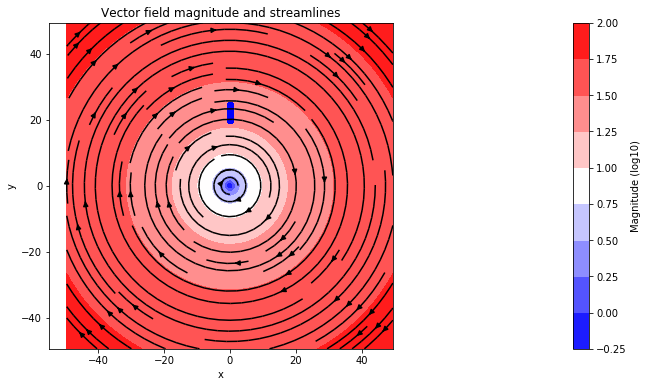

In [85]:
fig = plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.scatter(pts_x, pts_y, color='b')
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')